In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from helper import generate_digital, generate_event, visualize_scale, mismatch, model_params, plot_sims, generation

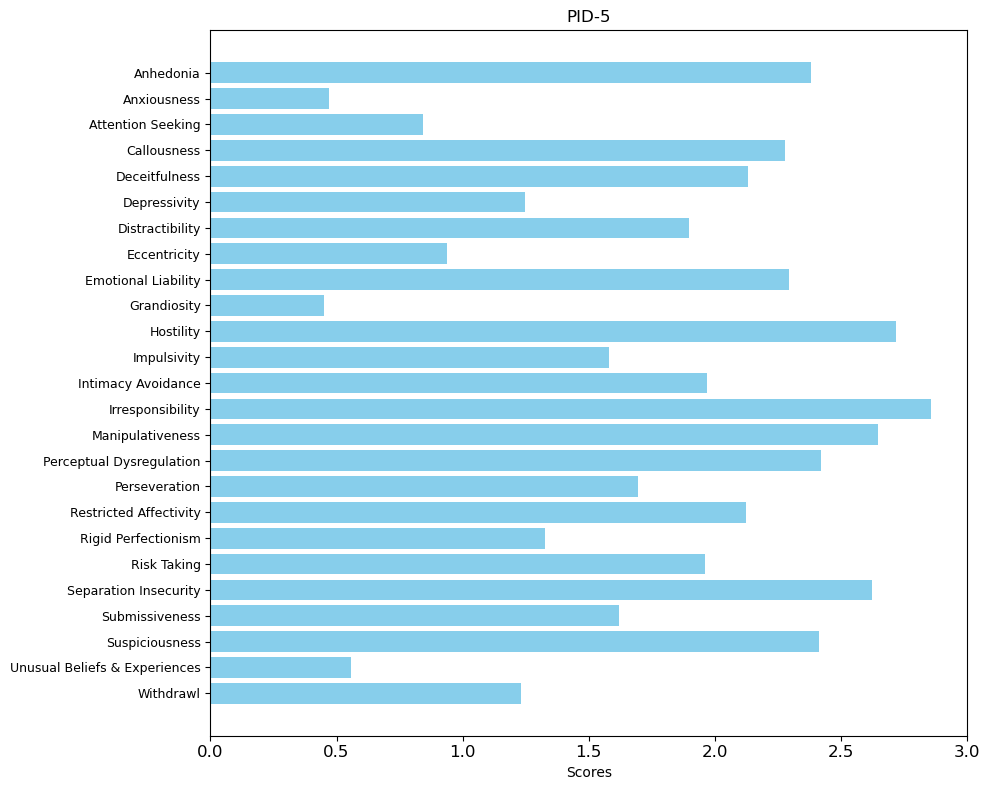

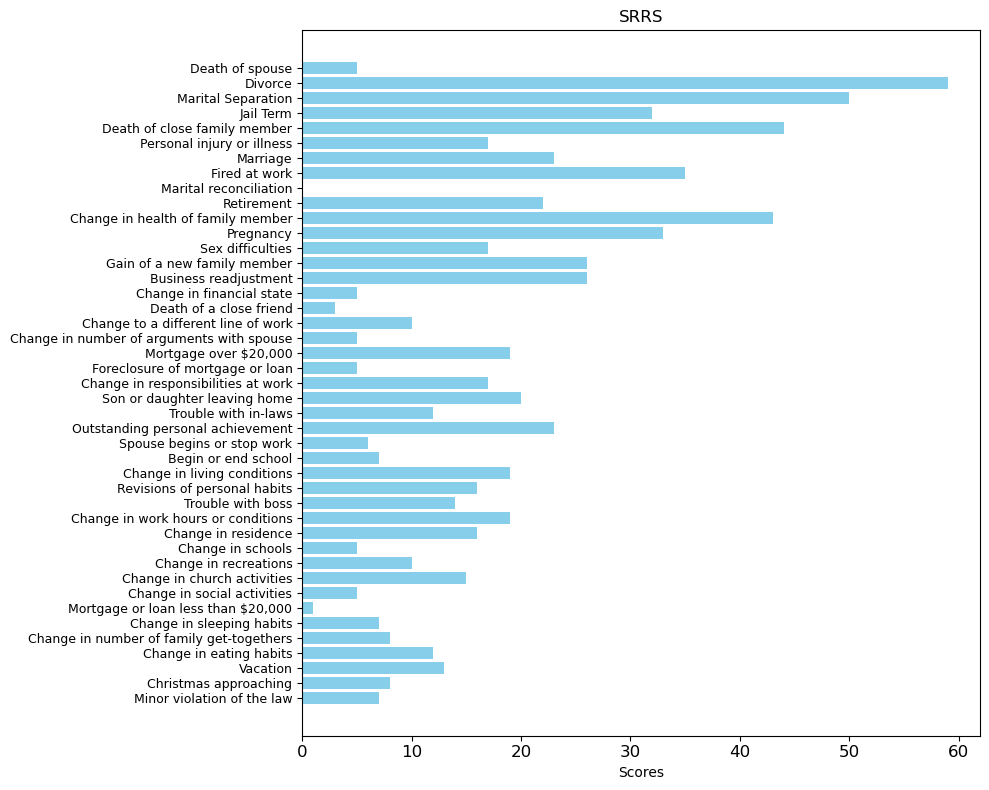

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Threshold:  45.31666666666666 
 tau:  9.43 
 w_sp = w_ip = w_dp =  0.5377777777777778 
 ambiguiti of symbolic likelihood:  1.2491666666666668 
 ambiguity of symbolic priors:  2.45375 
 ambiguity of imaginary likelihood:  3.916666666666666 
 ambiguity of imaginary priors:  2.6176666666666666 
 mismatch sym:  4.8370497427101204 
 mismatch img:  6.237623762376238 
 mismatch rea:  4.3026706231454


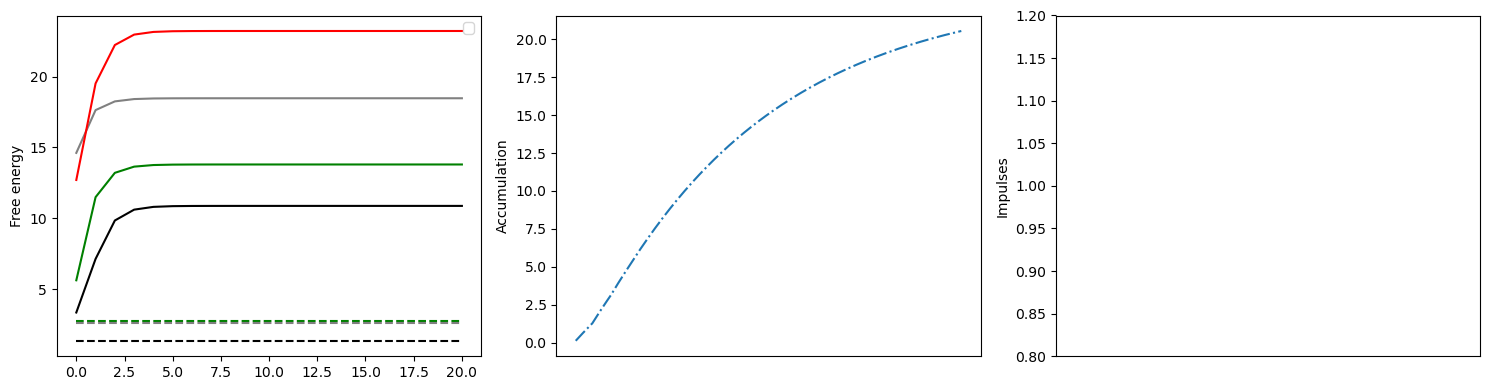

In [2]:
#Randomly generate scores for items in PID-5 and SRRS
with open('Scales/personality.json', 'r') as file:
    personality = json.load(file)
with open('Scales/lifeevents.json', 'r') as file:
    life_events = json.load(file)

pid = generate_digital(personality)
visualize_scale(pid, (10,8), 9, 'PID-5')
srrs = generate_event(life_events)
visualize_scale(srrs, (10,8), 9, 'SRRS')
threshold, tau, w_sd, w_si, w_sp, w_id, w_ip, w_dp, decays1, decays2, decayi1, decayi2, decayd1, decayd2 = model_params(pid)
mismatchs, mismatchi, mismatchd = mismatch(srrs)

print(
    "Threshold: ", threshold, "\n", "tau: ", tau, "\n", "w_sp = w_ip = w_dp = ", w_sp, "\n", "ambiguiti of symbolic likelihood: ", decays1,
    "\n", "ambiguity of symbolic priors: ", decays2, "\n", "ambiguity of imaginary likelihood: ", decayi1, "\n", "ambiguity of imaginary priors: ", decayi2, 
    "\n", "mismatch sym: ", mismatchs, "\n", "mismatch img: ", mismatchi, "\n", "mismatch rea: ", mismatchd
)

s_rec, v_rec, Fss_history, Fii_history, Fdd_history, Fp_history, Fs_min_history, Fi_min_history, Fd_min_history = generation(threshold, tau, w_sd, w_si, w_sp, w_id, w_ip, w_dp, decays1, decays2, decayi1, decayi2, decayd1, decayd2, mismatchs, mismatchi, mismatchd)
plot_sims(s_rec, v_rec, Fss_history, Fii_history, Fdd_history, Fp_history, Fs_min_history, Fi_min_history, Fd_min_history)